<img style ="float:right" src = "https://d1vwxdpzbgdqj.cloudfront.net/s3-public-images/learning-partners/greatlearning-brand.svg" width=15%>


<h1 id="Case-Study-4.1:-Create-a-Movie-Recommender">Case Study 4.1: Create a Movie Recommender<a class="anchor-link" href="https://courses.edx.org/asset-v1:MITxPRO+DSx+2T2019+type@asset+block@case_study_4.1_notebook_python_beginner.html#Case-Study-4.1:-Create-a-Movie-Recommender">¶</a></h1>


In [4]:
#!pip install scikit-surprise
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from surprise import Reader
from surprise import Dataset
from surprise import  SVD, NormalPredictor, KNNBasic
from surprise.model_selection import cross_validate
from surprise import accuracy
from IPython.display import display
from collections import defaultdict
from surprise.model_selection import KFold
from surprise.model_selection import train_test_split

## Reading the Data

In [6]:
col_names = ['user_id', 'item_id', 'rating', 'timestamp']
data = pd.read_table(r'E:/DataScience/MyPortfolio/u.data', names= col_names)
data = data.drop('timestamp', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  100000 non-null  int64
 1   item_id  100000 non-null  int64
 2   rating   100000 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


In [7]:
data.head()

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


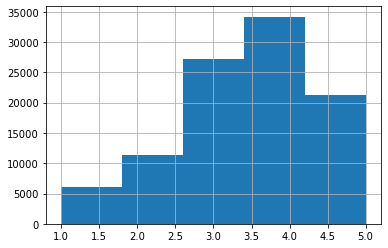

In [8]:
data.rating.hist(bins=5)
plt.show()

In [9]:
data.describe()

,user_id,item_id,rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


## Cross Validation


We will be using cross validation a lot in this code in the training and evaluation of our models. This strategy builds upon the idea of a train-test split, which you should already be familiar with.

Instead of doing 1 data split, though, we will do several of them. Each split of the data is called a fold. We let k denote the number of folds we use. k=5 is a common number to use.

This image provides a visual explanation of how cross validation works.

<img src ="https://upload.wikimedia.org/wikipedia/commons/1/1c/K-fold_cross_validation_EN.jpg"></img>

In [10]:
#coverting data in to surprise dataset
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(data[['user_id', 'item_id', 'rating']], reader)

## Model 1: Random

We want to first get a baseline value for our model. What better way to do that than with a random algorithm! Essentially, this first algorithm is not personalized to the desires of any users - we just assign them movie ratings based on the initial distribution of the data.

See the Model 1: Random section of your notebook and follow the instructions to create a new model, train it on the data and evaluate the RMSE.

In [11]:
#Algorithm predicting a random rating based on the distribution of the training set, which is assumed to be normal.
model_random = NormalPredictor()

In [12]:
model_using_normal_predictor = cross_validate(model_random, data, measures=['RMSE'], cv=5, verbose=False)

In [13]:
print('Average RMSE for Test Set using {} is '.format(model_random.__class__.__name__),model_using_normal_predictor['test_rmse'].mean())

Average RMSE for Test Set using NormalPredictor is  1.521455951416181


## Model 2: User-Based Collaborative Filtering

Surely, we can do much better than guessing the movie ratings randomly! Our next model will use the user-user defined notion of similarity to implement collaborative filtering.

See the Model 2: User-Based Collaborative Filtering section of your notebook and follow the instructions to create a new model, train it on the data and evaluate the RMSE.


 We will use KNNBasic and add parameter 'cosine' 

In [15]:
model_user_based = KNNBasic(sim_options ={'name':'cosine','user_base':True},verbose=False)
model_using_KNNbasic_cos_user = cross_validate(model_user_based, data, measures=['RMSE'], cv= 5, verbose=False)

In [16]:
print('Average RMSE for Test Set using {} is '.format(model_user_based.__class__.__name__),model_using_KNNbasic_cos_user['test_rmse'].mean())

Average RMSE for Test Set using KNNBasic is  1.0178727884729313


## Model 3: Item-Based Collaborative Filtering

Our next model will use the item-item defined notion of similarity to once again implement collaborative filtering.

See the Model 3: Item-Based Collaborative Filtering section of your notebook and follow the instructions to create a new model, train it on the data and evaluate the RMSE.

In [17]:
model_item_based = KNNBasic(sim_options ={'name':'cosine','user_base':False},verbose=False)
model_using_KNNbasic_cos_item = cross_validate(model_item_based,data,measures=['RMSE'],cv=5, verbose=False)

In [18]:
print('Average RMSE for Test Set using {} is '.format(model_item_based.__class__.__name__),model_using_KNNbasic_cos_item['test_rmse'].mean())

Average RMSE for Test Set using KNNBasic is  1.0167486253310414


## Model 4: Matrix Factorization

Our final model for this case study will use the matrix factorization approach with the SVD algorithm to try to predict user’s movie ratings. Here, we try to determine some underlying mathematical structure in the user rating matrix, which can help us predict missing ratings in the future.

See the Model 4: Matrix Factorization section of your notebook and follow the instructions to create a new model, train it on the data and evaluate the RMSE.

In [19]:
#matrix factorisation using svd
model_svd = SVD()
model_using_svd = cross_validate(model_svd,data,measures= ['RMSE'],cv=5, verbose=False)

In [20]:
print('Average RMSE for Test Set using {} is '.format(model_svd.__class__.__name__),model_using_svd['test_rmse'].mean())

Average RMSE for Test Set using SVD is  0.9354720820718855


In [21]:
#function can be found on surprise documentation FAQs
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls

In [22]:
#A basic cross-validation iterator.
kf = KFold(n_splits=5)

In [23]:
# Make list of k values
K = [5, 10]

# Make list of models
models = [model_random, model_user_based, model_item_based, model_svd]

for k in K:
    for model in models:
        print('> k={}, model={}'.format(k,model.__class__.__name__))
        p = []
        r = []
        for trainset, testset in kf.split(data):
            model.fit(trainset)
            predictions = model.test(testset, verbose=False)
            precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=3.5)

            # Precision and recall can then be averaged over all users
            p.append(sum(prec for prec in precisions.values()) / len(precisions))
            r.append(sum(rec for rec in recalls.values()) / len(recalls))
        
        print('-----> Precision: ', round(sum(p) / len(p), 3))
        print('-----> Recall: ', round(sum(r) / len(r), 3))

> k=5, model=NormalPredictor
-----> Precision:  0.566
-----> Recall:  0.32
> k=5, model=KNNBasic
-----> Precision:  0.733
-----> Recall:  0.439
> k=5, model=KNNBasic
-----> Precision:  0.73
-----> Recall:  0.438
> k=5, model=SVD
-----> Precision:  0.725
-----> Recall:  0.411
> k=10, model=NormalPredictor
-----> Precision:  0.566
-----> Recall:  0.413
> k=10, model=KNNBasic
-----> Precision:  0.705
-----> Recall:  0.577
> k=10, model=KNNBasic
-----> Precision:  0.705
-----> Recall:  0.576
> k=10, model=SVD
-----> Precision:  0.703
-----> Recall:  0.542


In [24]:

def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [25]:
trainset = data.build_full_trainset()
testset = trainset.build_anti_testset()

In [26]:
models = [model_random, model_user_based, model_item_based, model_svd]
for model in models:
    model.fit(trainset)
    predictions = model.test(testset)
    top_n = get_top_n(predictions, n=5)
    # Print the first one
    user = list(top_n.keys())[0]
    print(f'model: {model.__class__.__name__}, {user}: {np.round(top_n[user])}')

model: NormalPredictor, 196: [[ 265    5]
 [ 785    5]
 [ 274    5]
 [ 234    5]
 [1081    5]]
model: KNNBasic, 196: [[1189    5]
 [1500    5]
 [ 814    5]
 [1536    5]
 [1293    5]]
model: KNNBasic, 196: [[1189    5]
 [1500    5]
 [ 814    5]
 [1536    5]
 [1293    5]]
model: SVD, 196: [[318.   5.]
 [114.   5.]
 [408.   5.]
 [ 64.   5.]
 [169.   5.]]


In [27]:
models = [model_random, model_user_based, model_item_based, model_svd]
for model in models:
    model.fit(trainset)
    predictions = model.test(testset)
    top_n = get_top_n(predictions, n=5)
    # Print the first one
    user = list(top_n.keys())[0]
    print(f'model: {model.__class__.__name__}, {user}: {top_n[user]}')

model: NormalPredictor, 196: [(474, 5), (40, 5), (29, 5), (392, 5), (193, 5)]
model: KNNBasic, 196: [(1189, 5), (1500, 5), (814, 5), (1536, 5), (1293, 5)]
model: KNNBasic, 196: [(1189, 5), (1500, 5), (814, 5), (1536, 5), (1293, 5)]
model: SVD, 196: [(408, 4.67937556945784), (50, 4.487283830397223), (64, 4.383903027915241), (480, 4.383300817067007), (318, 4.377403691402064)]
